**Can you predict if bank customers will turnover next cycle?**

Customer churn prediction is to measure why customers are leaving a business.We will be looking at customer churn in a Bank. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

**Load Data**

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

**Drop RowNumber & CustomerID as it is of no use**

In [4]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Data Visualization**

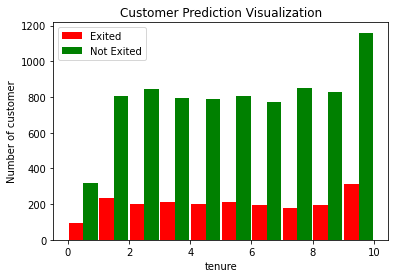

In [7]:
Exit = df[df.Exited==1].Tenure 
Not_Exit = df[df.Exited==0].Tenure 

plt.xlabel("tenure")
plt.ylabel("Number of customer")
plt.title("Customer Prediction Visualization")

plt.hist([Exit,Not_Exit],rwidth=0.95,color=['red','green'],label=['Exited','Not Exited'])
plt.legend()

In [8]:
df.groupby('Exited').EstimatedSalary.mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

In [9]:
df.groupby('Exited').Balance.mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [10]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column}:{df[column].unique()}')    

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


**Replacing Male to 1 and Female to 0**

In [11]:
df['Gender'].replace({'Male':1,"Female":0},inplace=True)

In [12]:
df.Gender.unique()

array([0, 1], dtype=int64)

**One hot encoding for categorical columns**

In [13]:
df1=pd.get_dummies(data=df,columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [14]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

**Scaling some of the columns**

In [15]:
cols_to_scale = ['Balance','EstimatedSalary','CreditScore','Age','Tenure','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [16]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Test & Train split**

In [17]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)



In [18]:
X_train.shape

(8000, 12)

In [19]:
y_train.shape

(8000,)

In [20]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,0,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,0,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,0,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,1,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,0,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,0,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,0,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,1,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,1,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [21]:
len(X_train.columns)

12

**Build a model (ANN) in tensorflow/keras**

In [22]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,)
])

#opt = keras.optimizers.Adam(learning_rate=0,01)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.7939 - accuracy: 0.6827
Epoch 2/50
250/250 [==============================] - 0s 981us/step - loss: 0.5649 - accuracy: 0.7940
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5096 - accuracy: 0.7977
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.8001
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.8004
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8040
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.8064
Epoch 8/50
250/250 [==============================] - 0s 949us/step - loss: 0.4526 - accuracy: 0.8054
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.8036
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.

In [23]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 970us/step - loss: 0.4185 - accuracy: 0.8365


[0.41848039627075195, 0.8364999890327454]

In [28]:
yp=model.predict(X_test)
yp[:5]

array([[-0.01003366],
       [ 0.18960826],
       [ 0.02793898],
       [ 0.16898845],
       [ 0.15805715]], dtype=float32)

In [26]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [30]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1595
           1       0.73      0.31      0.43       405

    accuracy                           0.84      2000
   macro avg       0.79      0.64      0.67      2000
weighted avg       0.82      0.84      0.81      2000



Text(69.0, 0.5, 'Truth')

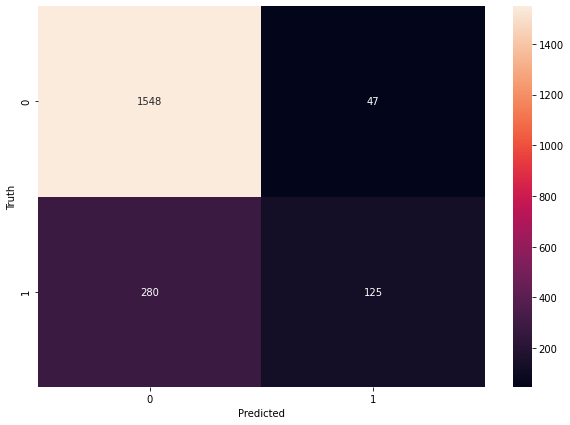

In [33]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Precision for 0 class**

In [35]:
precision=round(1584/(1584+280),2)
print(precision)

0.85


**Precision for 1 class**

In [37]:
precision=round(125/(47+125),2)
print(precision)

0.73


**Recall for 0 class**

In [41]:
recall=round(1584/(1548+47),2)
print(recall)

0.99


**Recall for 1 class**

In [43]:
recall=round(125/(280+125),2)
print(recall)

0.31
